In [1]:
import matplotlib.pyplot as plt
import datetime
import os
import json
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
import numpy as np
from main_pygod import get_data_from_loader, load_dataset, make_loader, create_model, train_model, test_model
import warnings

In [2]:
def create_metrics():
    return {"overall": {"roc_auc": [], "accuracy": [],"f1": [], "precision": [], "recall": []},
            "licit": {"precision": [], "recall": [],"f1-score": []}, 
           "illicit":{"precision": [], "recall": [],"f1-score": []}}

def hyperparameter_loop(group_para, parameter, parameter_list, metrics):
    """
    Run a grid search for a hyperparameter
    Args: hyperparameter, hyperparameter list, classification metrics (empty dict)
    Returns: Classification metrics dictionary
    """ 
    warnings.filterwarnings('ignore')
    for i in range(len(parameter_list)):
        config[group_para][parameter] = parameter_list[i]
        dataset, input_nodes = load_dataset(mask="train",use_aggregated=config["data"]["use_aggregated"],use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes)
        train_data = get_data_from_loader(loader)

        mymodel = create_model(config=config["model"])

        trained_model = train_model(mymodel, train_data)
    
        dataset, input_nodes = load_dataset(mask="test",use_aggregated=config["data"]["use_aggregated"],
        use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes,)    
        test_data = get_data_from_loader(loader)

        test_metrics = test_model(model=trained_model, data=test_data, output_directory=config["training"]["save_dir"])

        for key in list(test_metrics.keys())[0:-1]:
            metrics["overall"][key].append(test_metrics[key])
        output = test_metrics["classification_report"]
        for key in list(output["0"].keys())[0:-1]:
            metrics["licit"][key].append(output["0"][key])
            metrics["illicit"][key].append(output["1"][key])
        
    return metrics

def plot_metrics(metrics, para_list, parameter, x_log = False):
    """
    Plot the classification metrics
    Args:classification metrics
    Returns:None
    """ 

    size = (8,3)
    plt.figure(figsize= size)
    for key in list(metrics["overall"]):
        plt.plot(para_list, metrics["overall"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Total Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Overall Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["licit"]):
        plt.plot(para_list, metrics["licit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Licit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Licit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["illicit"]):
        plt.plot(para_list, metrics["illicit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Illicit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Illicit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

## DOMINANT using GAT backbone

In [4]:
config = {
        "model": {
            "hid_dim": 512,
            "num_layers": 6,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gat",
            "lr": 0.005,
            "epoch": 300,
            "gpu":0.9,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 2,
            "device" : "cuda"
        },
        "data": {
            "use_aggregated": False,
            "use_temporal": False,
            "batch_size": 5000
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [6]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [4, 5, 6, 7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[9987, 93], edge_index=[2, 9995], y=[9987])
creating model with {'hid_dim': 512, 'num_layers': 4, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x0000018A29C648B0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 300, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 51342.6587 |  | Time 1.46
Epoch 0001: Loss 14771.0227 |  | Time 1.17
Epoch 0002: Loss 5635.2568 |  | Time 1.16
Epoch 0003: Loss 3139.6102 |  | Time 1.16
Epoch 0004: Loss 2154.9346 |  | Time 1.15
Epoch 0005: Loss 1204.1130 |  | Time 1.17
Epoch 0006: Loss 626.6220 |  | Time 1.16
Epoch 0007: Loss 609.8101 |  | Time 1.15
Epoch 0008: Loss 375.9192 |  | Time 1.17
Epoch 0009: Loss 269.7046 |  | Time 1.16
Epoch 0010: Loss 193.3412 |  | Time 1.15
Epoch 0011: Loss 172.1722 |  | Time 1.16
Epoch 0012: Loss 144.4082 |  | Time 1.17
Epoch 0013: Loss 88.4046 |  | Tim

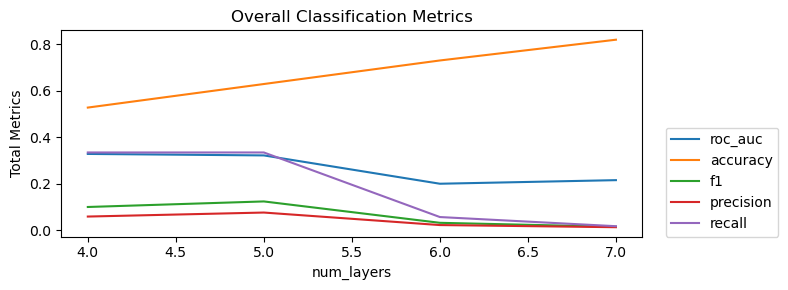

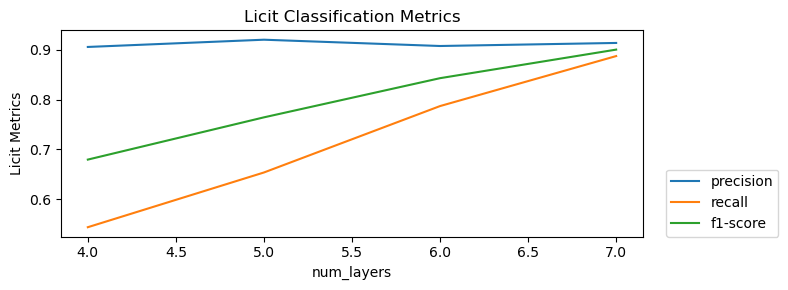

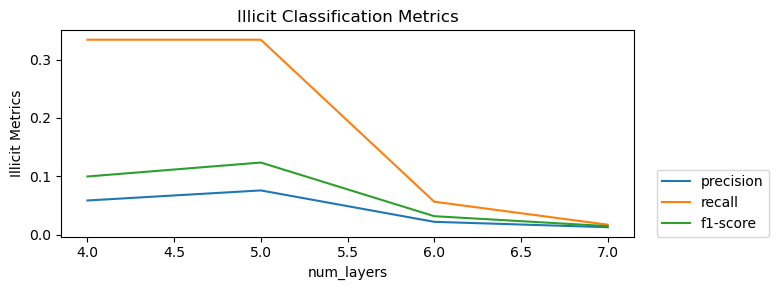

In [7]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [9]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [128, 256, 512]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10018, 93], edge_index=[2, 10017], y=[10018])
creating model with {'hid_dim': 128, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x0000018A29C648B0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 300, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 2137.1399 |  | Time 1.84
Epoch 0001: Loss 331.1012 |  | Time 1.85
Epoch 0002: Loss 446.1195 |  | Time 1.86
Epoch 0003: Loss 151.6114 |  | Time 1.87
Epoch 0004: Loss 63.0175 |  | Time 1.88
Epoch 0005: Loss 62.5537 |  | Time 1.85
Epoch 0006: Loss 53.7459 |  | Time 1.85
Epoch 0007: Loss 69.4800 |  | Time 1.85
Epoch 0008: Loss 59.4540 |  | Time 1.85
Epoch 0009: Loss 63.7080 |  | Time 1.86
Epoch 0010: Loss 55.4292 |  | Time 1.85
Epoch 0011: Loss 46.9908 |  | Time 1.85
Epoch 0012: Loss 52.7983 |  | Time 1.87
Epoch 0013: Loss 33.8139 |  | Time 1.87
Epoch 

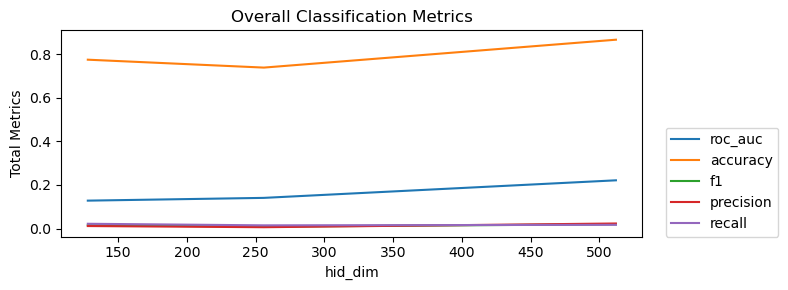

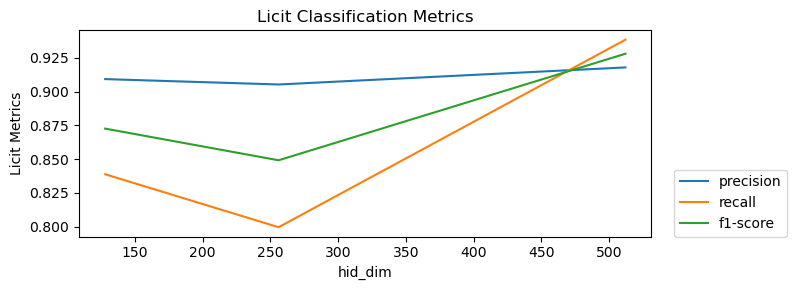

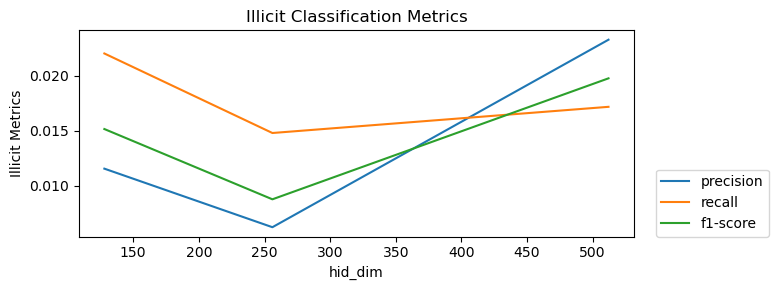

In [10]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [8]:
metrics = create_metrics()
para_change = "dropout"
para_list = [ 0.1, 0.15, 0.2]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[10035, 93], edge_index=[2, 10041], y=[10035])
creating model with {'hid_dim': 512, 'num_layers': 6, 'dropout': 0.1, 'weight_decay': 0.0, 'act': <function relu at 0x000001D1BFCB81F0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 300, 'gpu': 0.9, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 2, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 47995.8551 |  | Time 2.73
Epoch 0001: Loss 11095.3448 |  | Time 2.08
Epoch 0002: Loss 2138.6768 |  | Time 2.09
Epoch 0003: Loss 2184.4737 |  | Time 2.10
Epoch 0004: Loss 1049.9927 |  | Time 2.10
Epoch 0005: Loss 909.7545 |  | Time 2.10
Epoch 0006: Loss 459.0365 |  | Time 2.10
Epoch 0007: Loss 382.1185 |  | Time 2.10
Epoch 0008: Loss 245.1155 |  | Time 2.10
Epoch 0009: Loss 132.7619 |  | Time 2.09
Epoch 0010: Loss 92.2824 |  | Time 2.11
Epoch 0011: Loss 79.4405 |  | Time 2.11
Epoch 0012: Loss 62.3265 |  | Time 2.10
Epoch 0013: Loss 56.4270 |  | Time

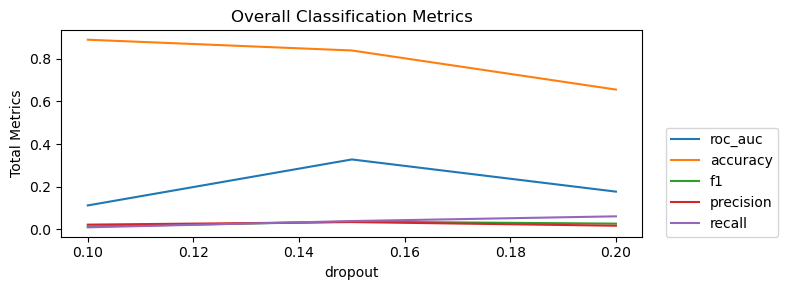

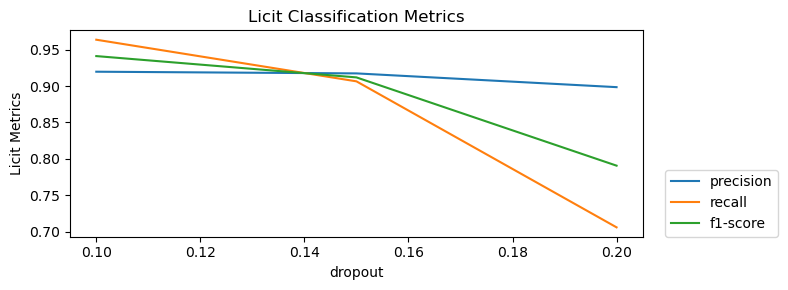

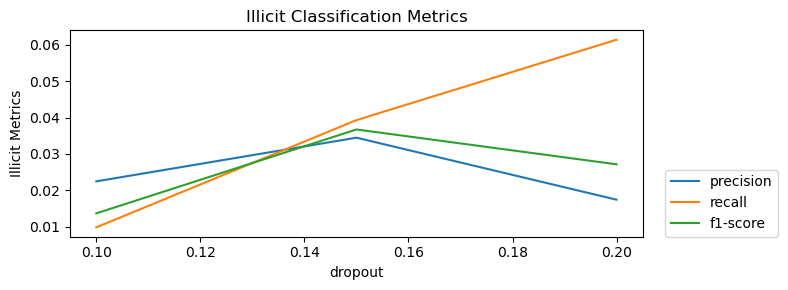

In [9]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [ ]:
# metrics = create_metrics()
# para_change = "num_neigh"
# para_list = [10,15]

# metrics = hyperparameter_loop("model", para_change, para_list, metrics)

In [ ]:
# plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [ ]:
# metrics = create_metrics()
# para_change = "epoch"
# para_list = [10, 20 , 30 ]

# metrics = hyperparameter_loop("model", para_change, para_list, metrics)

In [ ]:
# plot_metrics(metrics, para_list, para_change, x_log=False)